In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
df['Area']=df['longitude']*df['latitude']

In [5]:
df['total_rooms'] = df['total_rooms']+df['total_bedrooms']

In [6]:
df = df.drop(['longitude', 'latitude','total_bedrooms','ocean_proximity','population','households','median_income'], axis=1)

In [7]:
df.fillna(5,axis='columns',inplace=True)

In [8]:
df.isnull().sum()

housing_median_age    0
total_rooms           0
median_house_value    0
Area                  0
dtype: int64

array([[<AxesSubplot:title={'center':'housing_median_age'}>,
        <AxesSubplot:title={'center':'total_rooms'}>],
       [<AxesSubplot:title={'center':'median_house_value'}>,
        <AxesSubplot:title={'center':'Area'}>]], dtype=object)

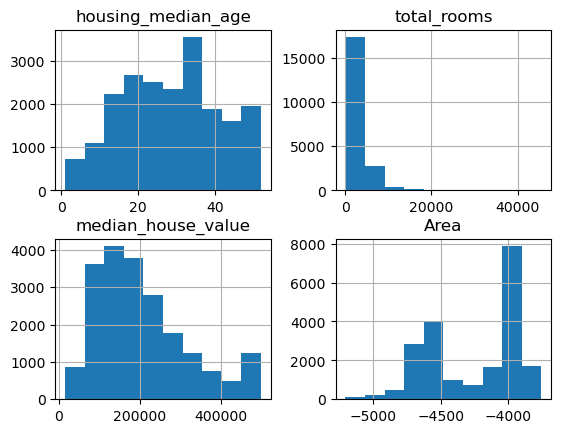

In [9]:
df.hist(bins=10)

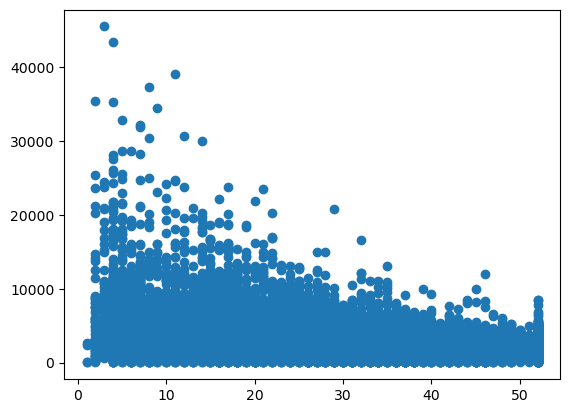

In [10]:
plt.scatter(df['housing_median_age'],df['total_rooms'])

In [11]:
msk = np.random.rand(len (df))<0.8
train = df[msk]
test = df[~msk]

In [12]:
reg = LinearRegression()

In [13]:
train_x = np.asanyarray(train[['total_rooms']])
train_y = np.asanyarray(train[['housing_median_age']])
reg.fit(train_x,train_y)

LinearRegression()

In [14]:
print('Cofficient',reg.coef_)
print('Intercept',reg.intercept_)

Cofficient [[-0.00170757]]
Intercept [33.98241244]


In [15]:
from sklearn.metrics import  r2_score
test_x = np.asanyarray(test[['total_rooms']])
test_y = np.asanyarray(test[['housing_median_age']])
test_y_= reg.predict(test_x)
print("Mean Ablosute : %.2f" %np.mean(np.absolute(test_y_ - test_y)))

print("Residual sum of square(MSE): %.2f" %np.mean((test_y_  - test_y)))

print("R2-score%.2f" %r2_score(test_y_,test_y))

Mean Ablosute : 9.90
Residual sum of square(MSE): -0.12
R2-score-6.22
